# <center>Malignant Comment Classification</center>


In [1]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train=pd.read_csv('./train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
test=pd.read_csv('./test.csv')

test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
print('train shape is ',train.shape)
print('test shape is ',test.shape)
print('test info',test.info)


print('train info',train.info)


train shape is  (159571, 8)
test shape is  (153164, 2)
test info <bound method DataFrame.info of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is no

In [5]:
print('train data Set descriptin',train.describe())
print('test data Set descriptin',test.describe())

train data Set descriptin            malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000 

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
Axes(0.125,0.11;0.62x0.77)


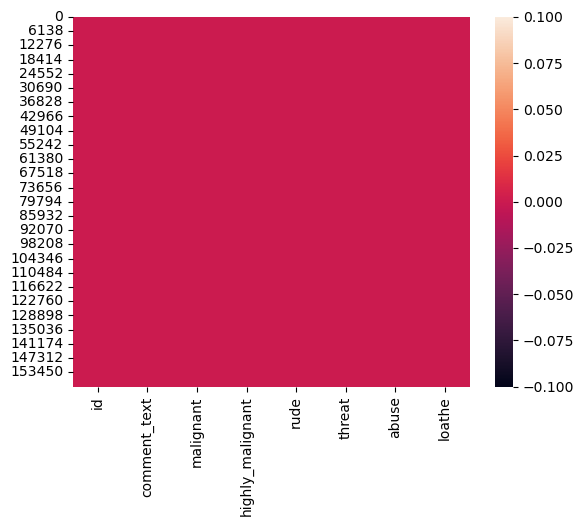

In [6]:

# checking null values
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

C:\Users\S MOHAMMED ASHIQ\AppData\Local\Temp\ipykernel_30052\157462647.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  


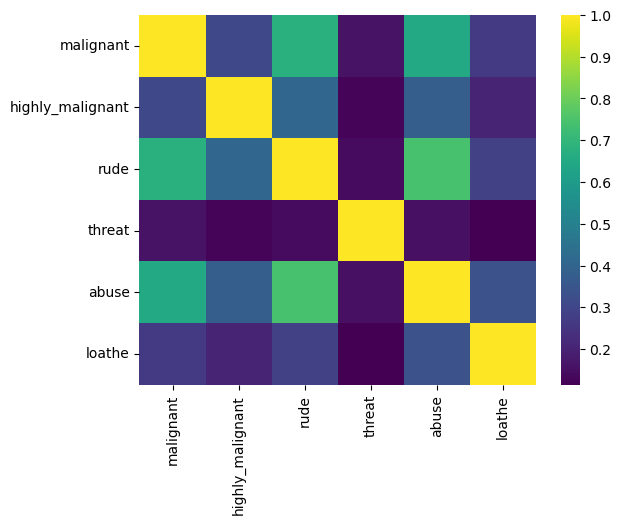

In [7]:
import seaborn as sns

# checking correlation in dataset
correlation_matrix = train.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, cmap='viridis')
plt.show()


In [8]:
# checking the skewness for the features:

train.skew()

C:\Users\S MOHAMMED ASHIQ\AppData\Local\Temp\ipykernel_30052\771478856.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

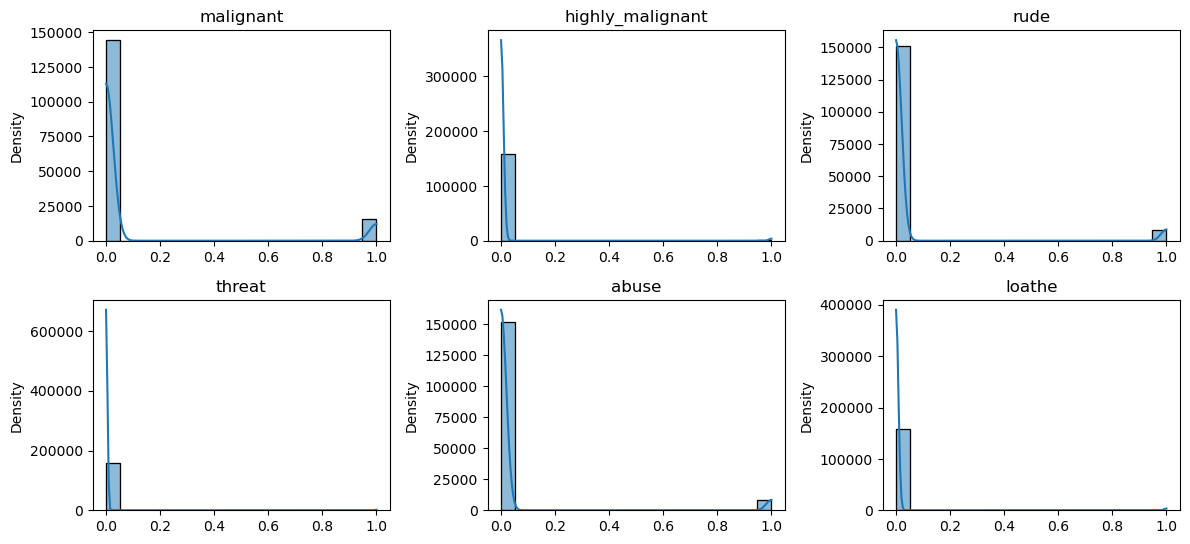

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

features = train.drop(columns=['id', 'comment_text'])


plt.figure(figsize=(12, 8))
for i, col in enumerate(features.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(train[col], kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


malignant


0    144277
1     15294
Name: malignant, dtype: int64


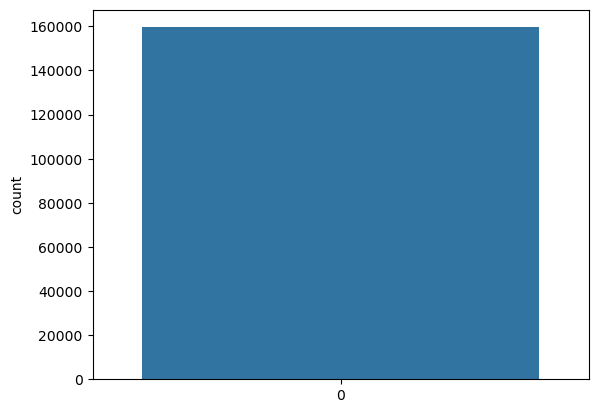

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


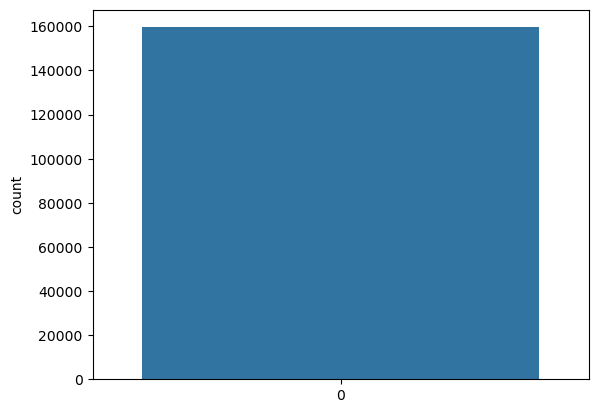

loathe


0    158166
1      1405
Name: loathe, dtype: int64


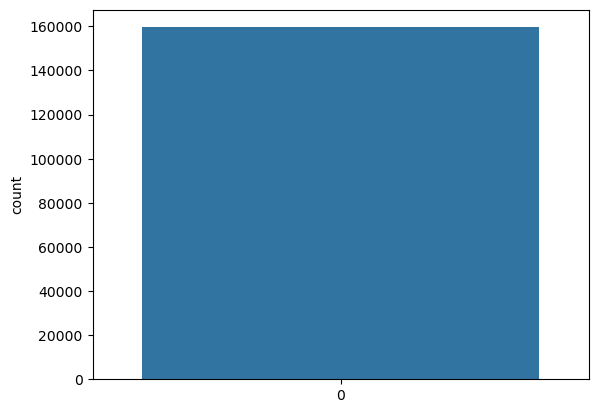

rude


0    151122
1      8449
Name: rude, dtype: int64


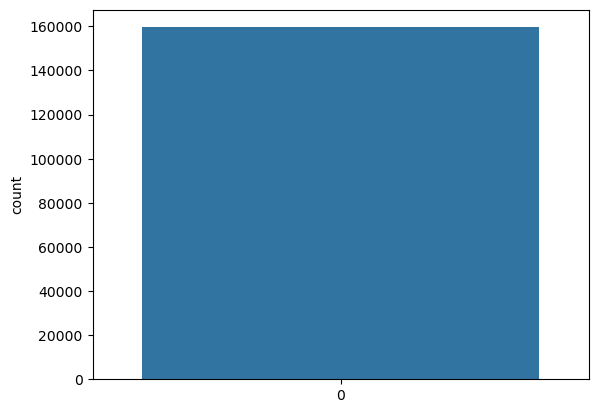

abuse


0    151694
1      7877
Name: abuse, dtype: int64


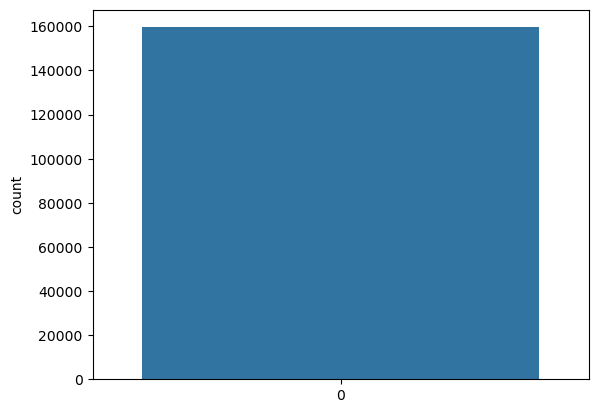

threat


0    159093
1       478
Name: threat, dtype: int64


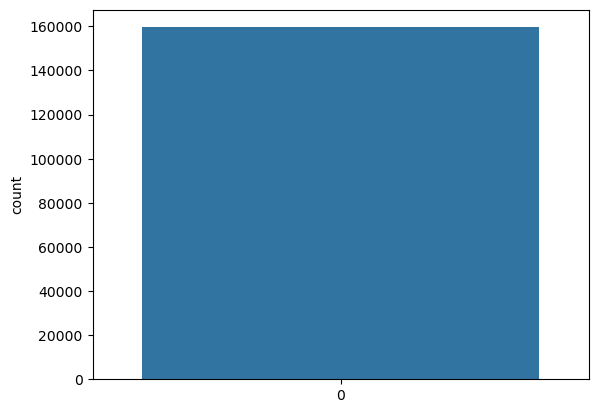

In [10]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    
    plt.show()

In [11]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [12]:
train['length'] = train['comment_text'].str.len()
train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [13]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to C:\Users\S MOHAMMED
[nltk_data]     ASHIQ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

C:\Users\S MOHAMMED ASHIQ\AppData\Local\Temp\ipykernel_30052\2392113331.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
C:\Users\S MOHAMMED ASHIQ\AppData\Local\Temp\ipykernel_30052\2392113331.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
C:\Users\S MOHAMMED ASHIQ\AppData\Local\Temp\ipykernel_30052\2392113331.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
C:\Users\S MOHAMMED ASHIQ\AppData\Local\Temp\ipykernel_30052\2392113331.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = tra

In [15]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [16]:

# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


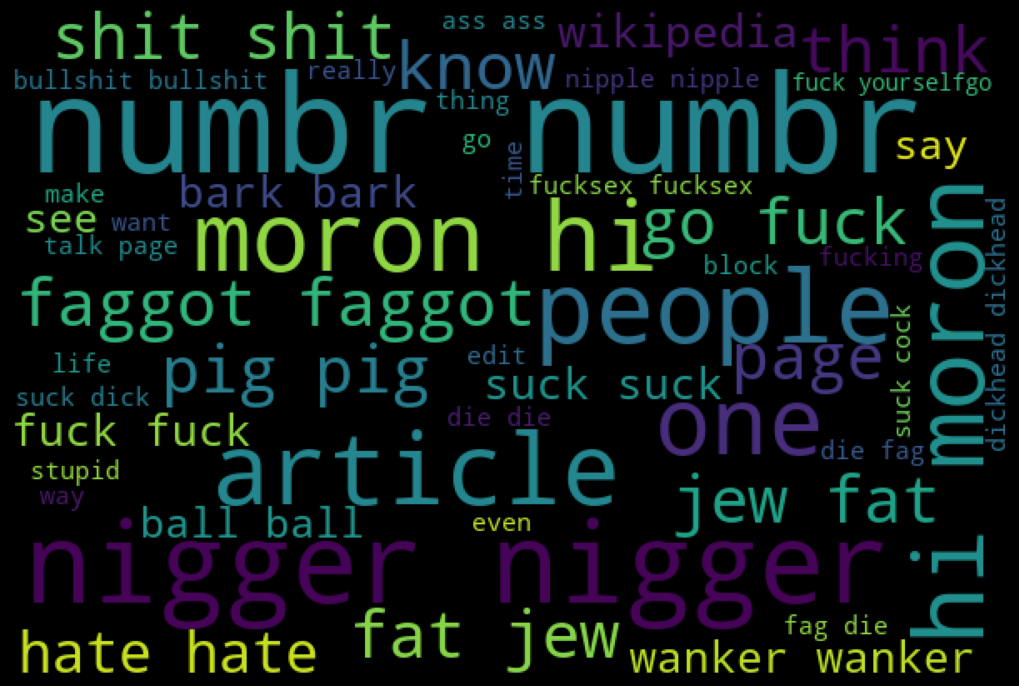

In [17]:

#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
#plt.show()

In [18]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

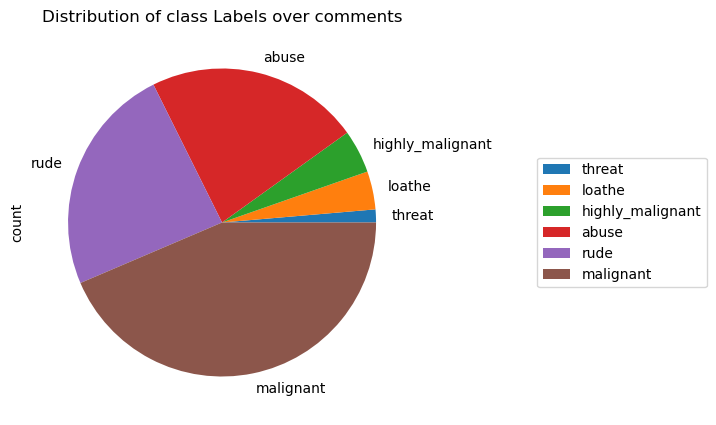

In [19]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Distribution of class Labels over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [20]:

target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


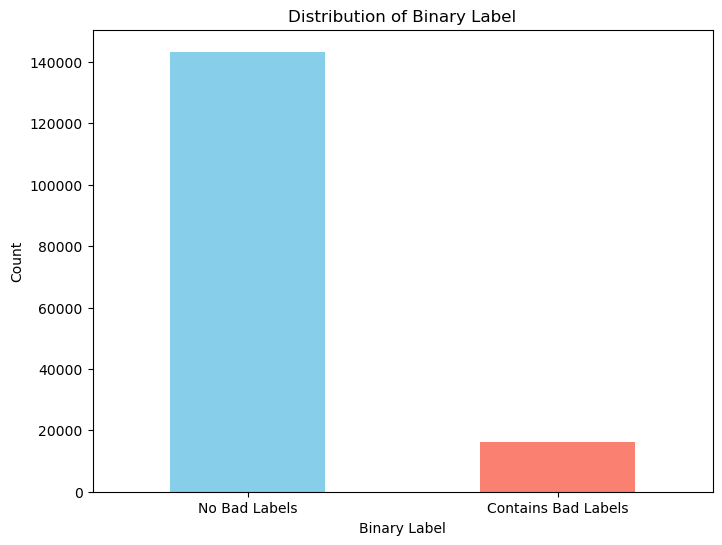

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
label_counts = train['bad'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Binary Label')
plt.xlabel('Binary Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Bad Labels', 'Contains Bad Labels'], rotation=0)
plt.show()


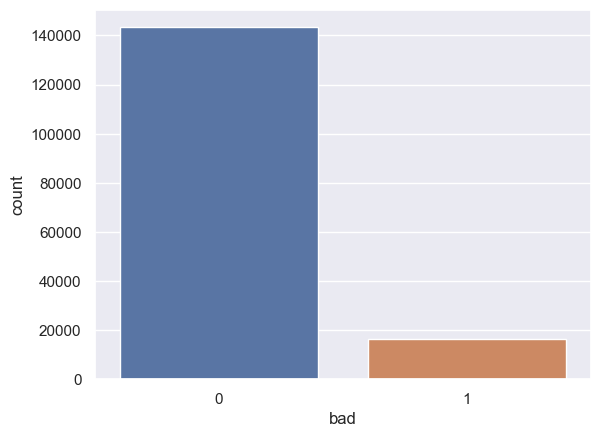

In [23]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

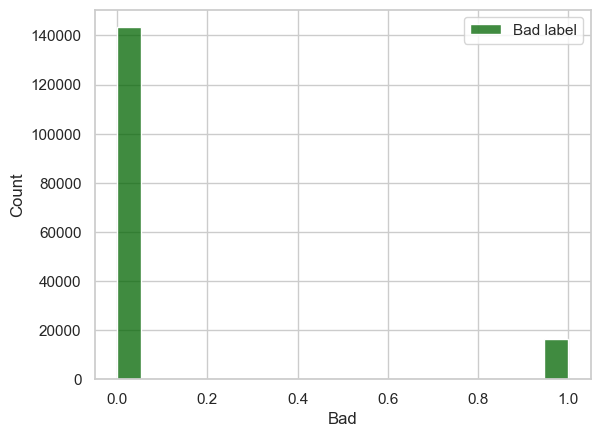

In [27]:
sns.set(style="whitegrid")
sns.histplot(data=train, x="bad", color="darkgreen", kde=False, label="Bad label")
plt.xlabel("Bad")
plt.ylabel("Count")
plt.legend()
plt.show()


In [23]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [24]:
train.shape

(159571, 11)

In [25]:
test.shape

(153164, 2)

In [26]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [27]:

y_train.shape,y_test.shape

((111699,), (47872,))

Training accuracy is 0.9595520103134316
Test accuracy is 0.9552974598930482


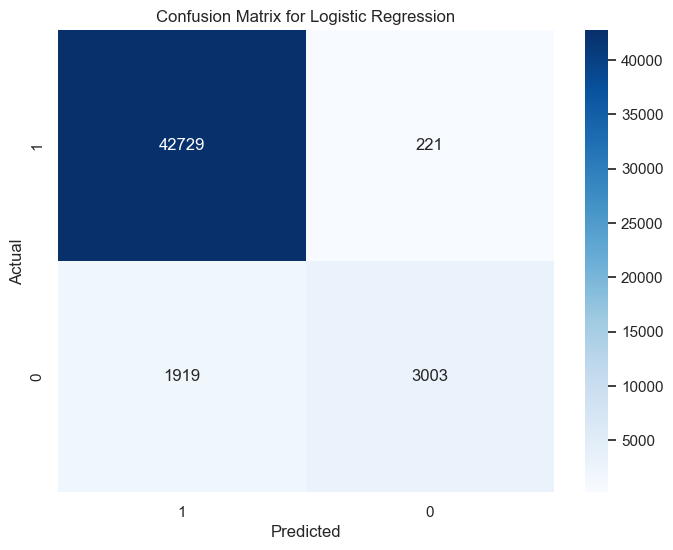

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [108]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.9392755681818182


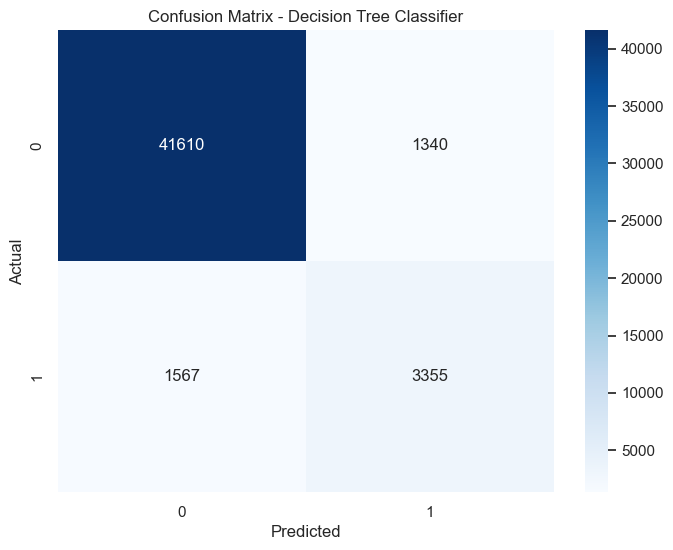

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.68      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [139]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

print(classification_report(y_test,y_pred_test))


Training accuracy is 0.9612530103223843
Test accuracy is 0.9524565508021391
[[42675   275]
 [ 2001  2921]]


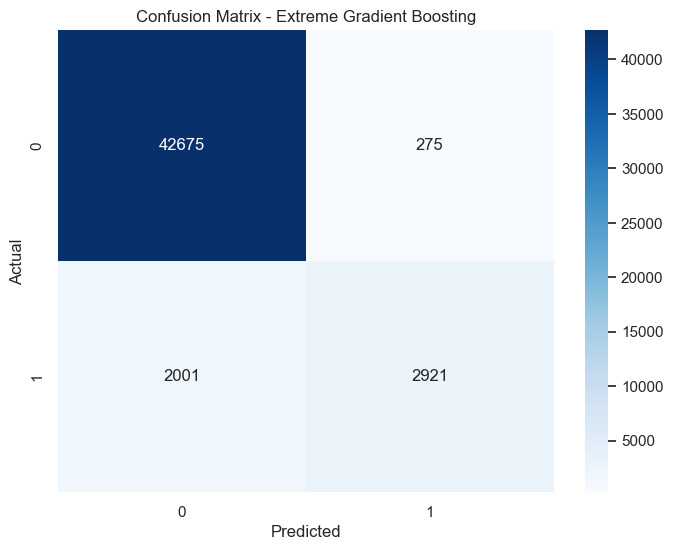

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.91      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.93      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [140]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Extreme Gradient Boosting')
plt.show()

print(classification_report(y_test,y_pred_test))

Training accuracy is 0.951118631321677
Test accuracy is 0.9490307486631016
[[42553   397]
 [ 2043  2879]]


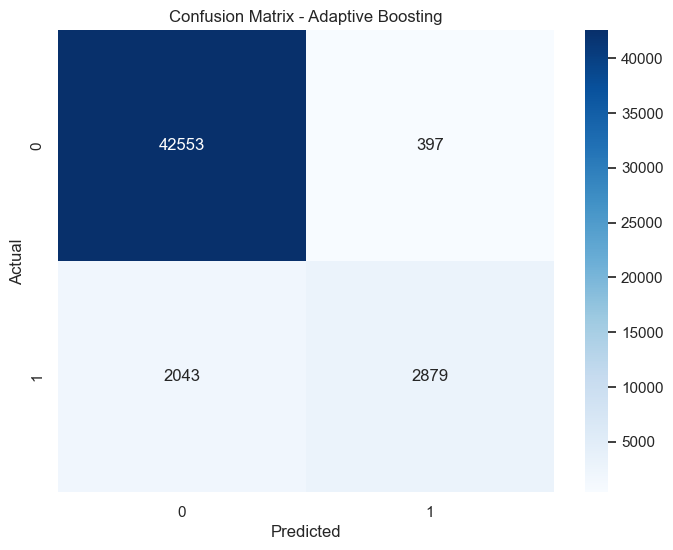

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [141]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Adaptive Boosting')
plt.show()

print(classification_report(y_test,y_pred_test))

In [69]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988451105202374
Test accuracy is 0.9548170120320856



KeyboardInterrupt



Training accuracy is 0.9988809210467416
Test accuracy is 0.9546916778074866


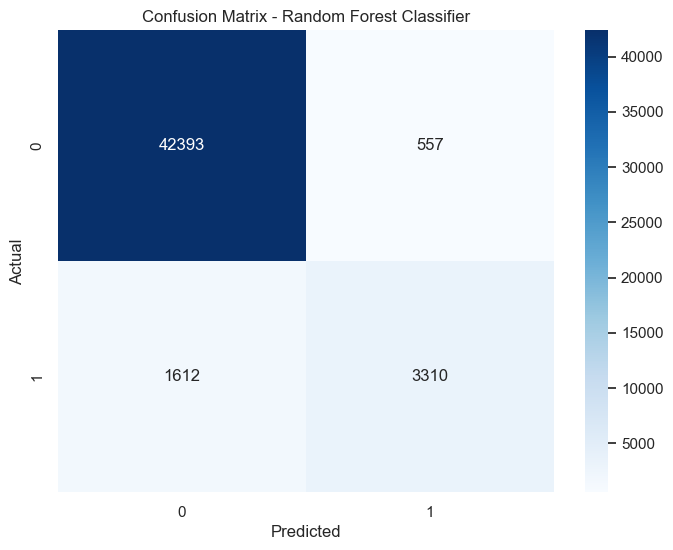

[[42393   557]
 [ 1612  3310]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



In [28]:
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9273135838279662
Test accuracy is 0.9203292112299465


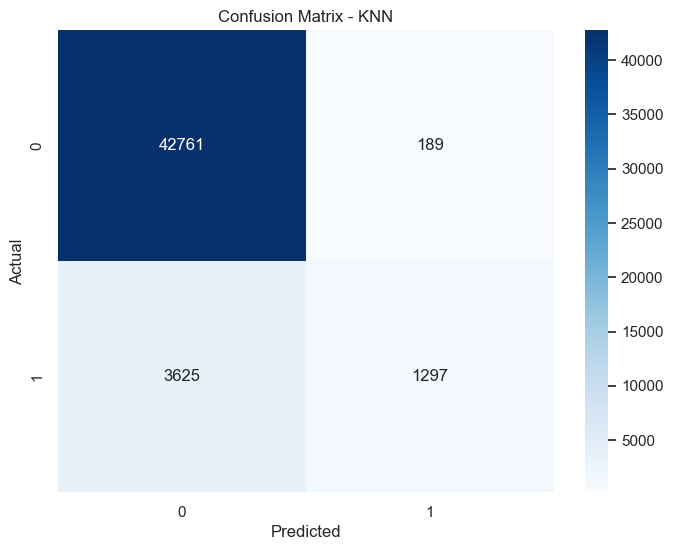

[[42761   189]
 [ 3625  1297]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.87      0.26      0.40      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.63      0.68     47872
weighted avg       0.92      0.92      0.90     47872



In [101]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9504292786864699
Test accuracy is 0.946524064171123


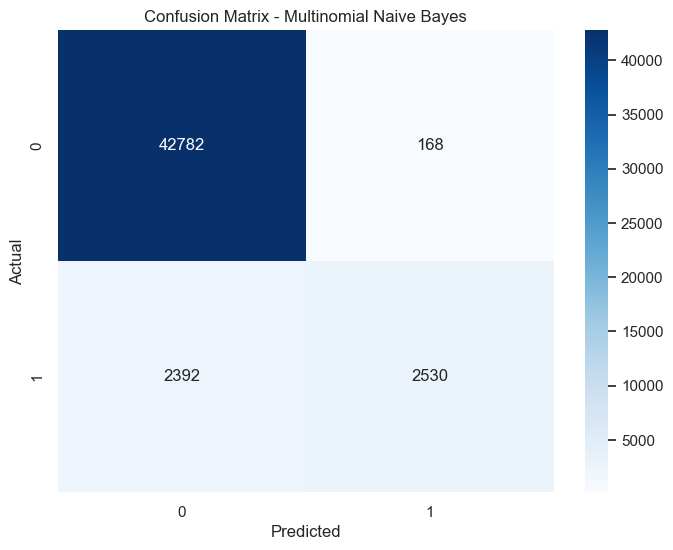

[[42782   168]
 [ 2392  2530]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42950
           1       0.94      0.51      0.66      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.76      0.82     47872
weighted avg       0.95      0.95      0.94     47872



In [112]:
#Multinomial NB
# Naive Bayes Classifier
NB = MultinomialNB()
NB.fit(x_train, y_train)

y_pred_train = NB.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

y_pred_test = NB.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, y_pred_test)))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()


print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


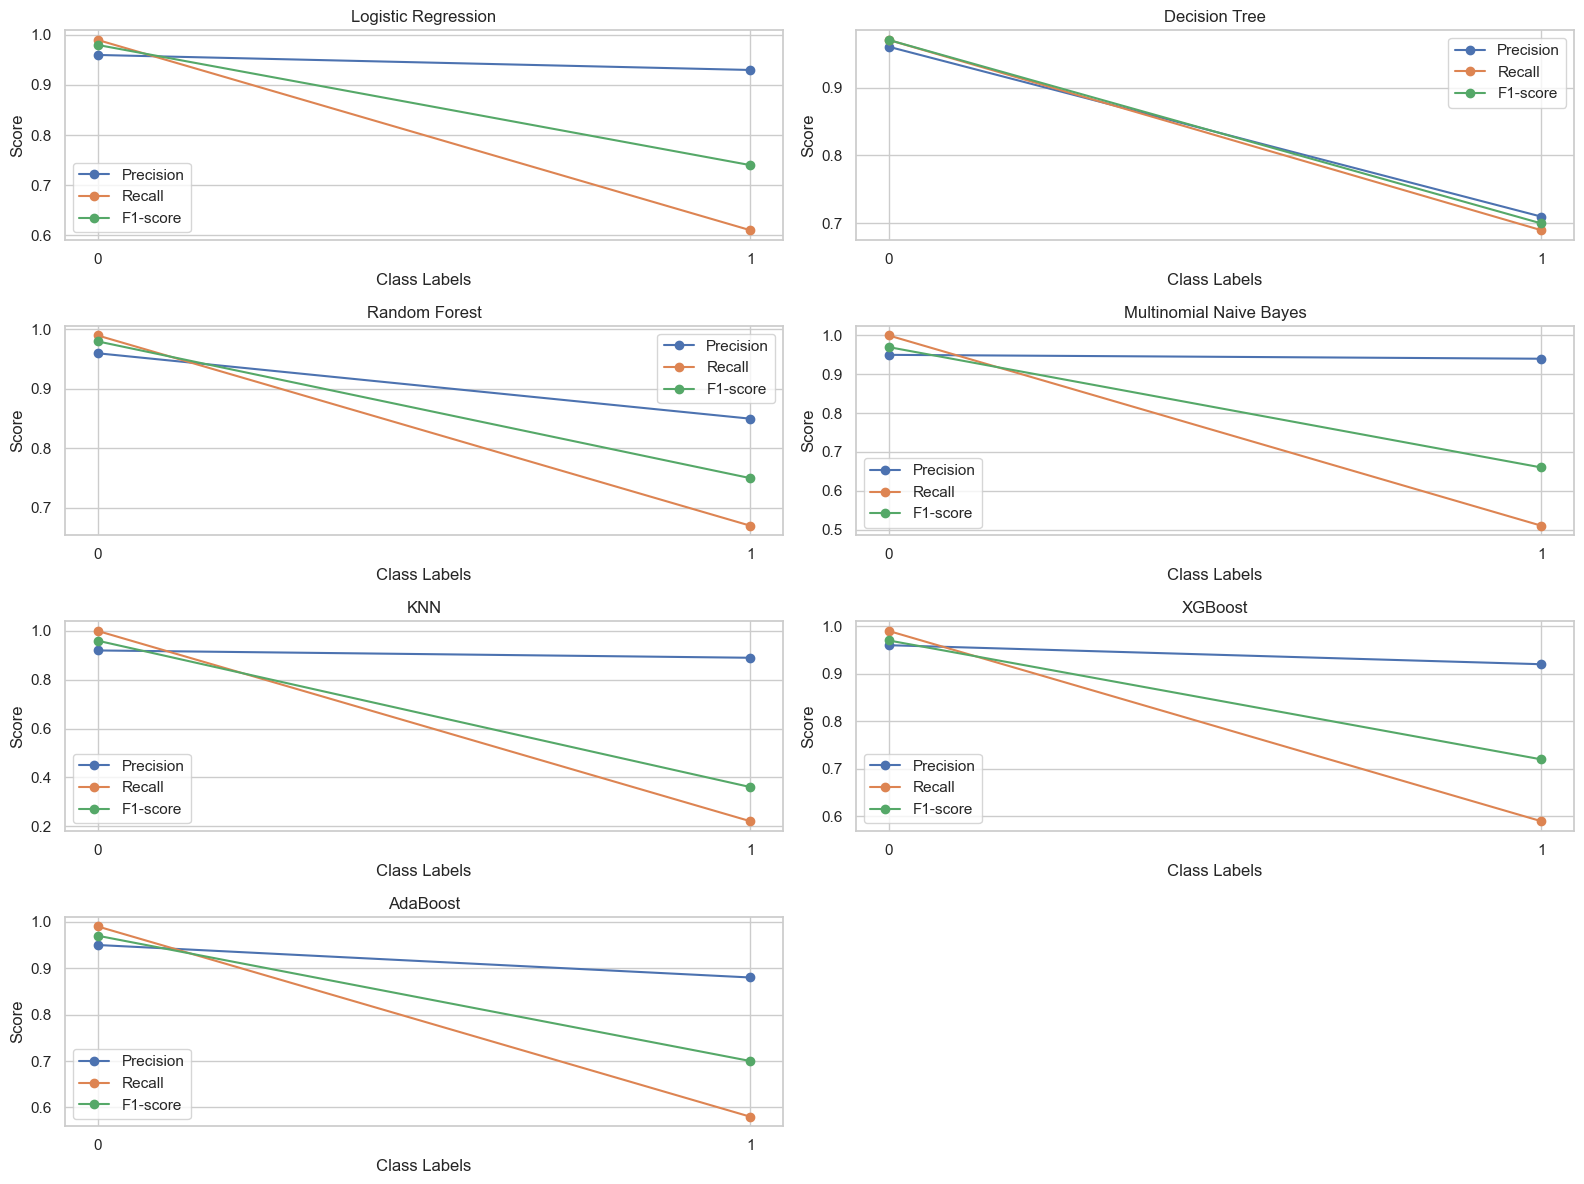

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define class labels and classification report metrics for each model
class_labels = ['0', '1']
reports = {
    'Logistic Regression': {
        'precision': [0.96, 0.93],
        'recall': [0.99, 0.61],
        'f1_score': [0.98, 0.74]
    },
    'Decision Tree': {
        'precision': [0.96, 0.71],
        'recall': [0.97, 0.69],
        'f1_score': [0.97, 0.70]
    },
    'Random Forest': {
        'precision': [0.96, 0.85],
        'recall': [0.99, 0.67],
        'f1_score': [0.98, 0.75]
    },
    
    'Multinomial Naive Bayes': {
        'precision': [0.95, 0.94],
        'recall': [1.00, 0.51],
        'f1_score': [0.97, 0.66]
    },
    'KNN': {
        'precision': [0.92, 0.89],
        'recall': [1.00, 0.22],
        'f1_score': [0.96, 0.36]
    },
    
    'XGBoost': {
        'precision': [0.96, 0.92],
        'recall': [0.99, 0.59],
        'f1_score': [0.97, 0.72]
    },
    'AdaBoost': {
        'precision': [0.95, 0.88],
        'recall': [0.99, 0.58],
        'f1_score': [0.97, 0.70]
    },
}

# Plotting
plt.figure(figsize=(16, 12))

for i, (model, report) in enumerate(reports.items(), 1):
    precision = report['precision']
    recall = report['recall']
    f1_score = report['f1_score']
    
    plt.subplot(4, 2, i)
    x = np.arange(len(class_labels))
    
    plt.plot(x, precision, marker='o', label='Precision')
    plt.plot(x, recall, marker='o', label='Recall')
    plt.plot(x, f1_score, marker='o', label='F1-score')

    plt.xlabel('Class Labels')
    plt.ylabel('Score')
    plt.title(model)
    plt.xticks(x, class_labels)
    plt.legend()

plt.tight_layout()
plt.show()


In [136]:
import pandas as pd

# Define the ML algorithms and their training/test accuracies
data = {
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN',  'Multinomial Naive Bayes', 'XGBoost', 'AdaBoost'],
    'Training Accuracy (%)': [95.96 , 99.89, 99.89 , 92.73 , 95.04 , 96.13 , 95.12],
    'Test Accuracy (%)': [95.53,93.99,95.47,92.03,94.66,95.25,94.90]
}

fd = pd.DataFrame(data)
fd


,Algorithm,Training Accuracy (%),Test Accuracy (%)
0,Logistic Regression,95.96,95.53
1,Decision Tree,99.89,93.99
2,Random Forest,99.89,95.47
3,KNN,92.73,92.03
4,Multinomial Naive Bayes,95.04,94.66
5,XGBoost,96.13,95.25
6,AdaBoost,95.12,94.90


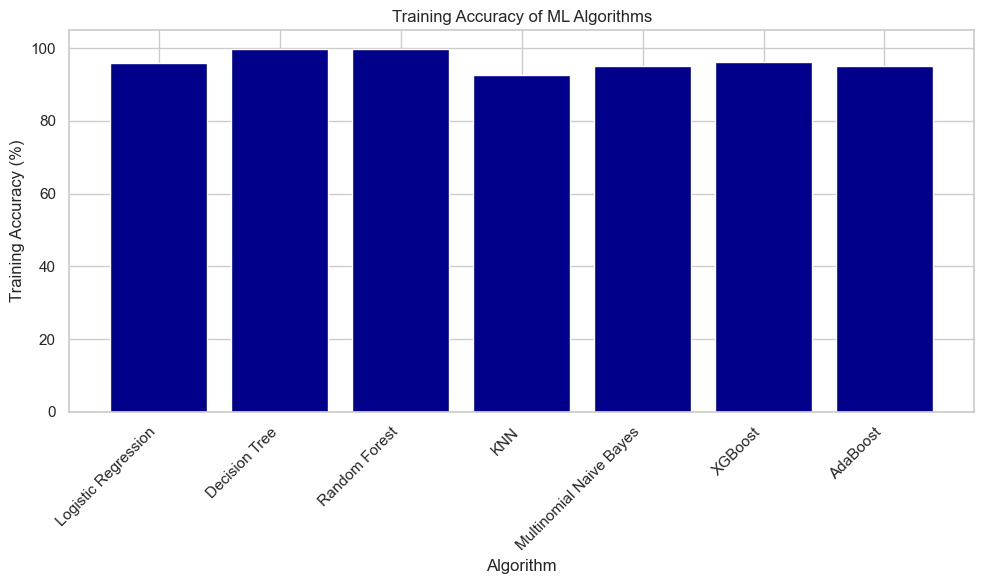

In [103]:
import matplotlib.pyplot as plt

# Define the ML algorithms and their training/test accuracies
data = {
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN',  'Multinomial Naive Bayes', 'XGBoost', 'AdaBoost'],
    'Training Accuracy (%)': [95.96 , 99.89, 99.89 , 92.73 , 95.04 , 96.13 , 95.12],
    'Test Accuracy (%)': [95.53,93.99,95.47,92.03,94.66,95.25,94.90]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the bar plot for training accuracies only
plt.figure(figsize=(10, 6))
plt.bar(df['Algorithm'], df['Training Accuracy (%)'], color='darkblue')
plt.xlabel('Algorithm')
plt.ylabel('Training Accuracy (%)')
plt.title('Training Accuracy of ML Algorithms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


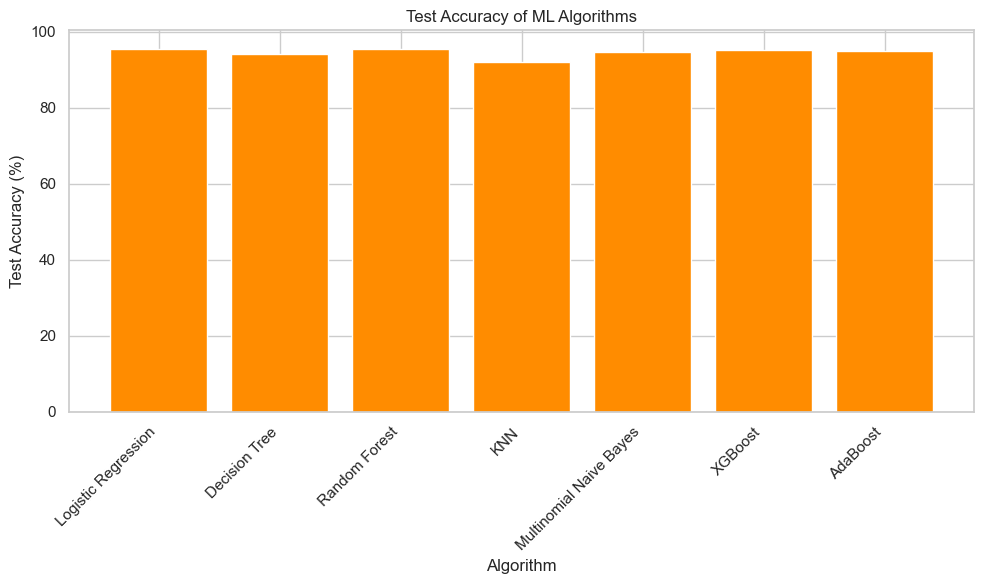

In [104]:
import matplotlib.pyplot as plt

# Define the ML algorithms and their training/test accuracies
data = {
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN',  'Multinomial Naive Bayes', 'XGBoost', 'AdaBoost'],
    'Training Accuracy (%)': [95.96 , 99.89, 99.89 , 92.73 , 95.04 , 96.13 , 95.12],
    'Test Accuracy (%)': [95.53,93.99,95.47,92.03,94.66,95.25,94.90]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the bar plot for testing accuracies only
plt.figure(figsize=(10, 6))
plt.bar(df['Algorithm'], df['Test Accuracy (%)'], color='darkorange')
plt.xlabel('Algorithm')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy of ML Algorithms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


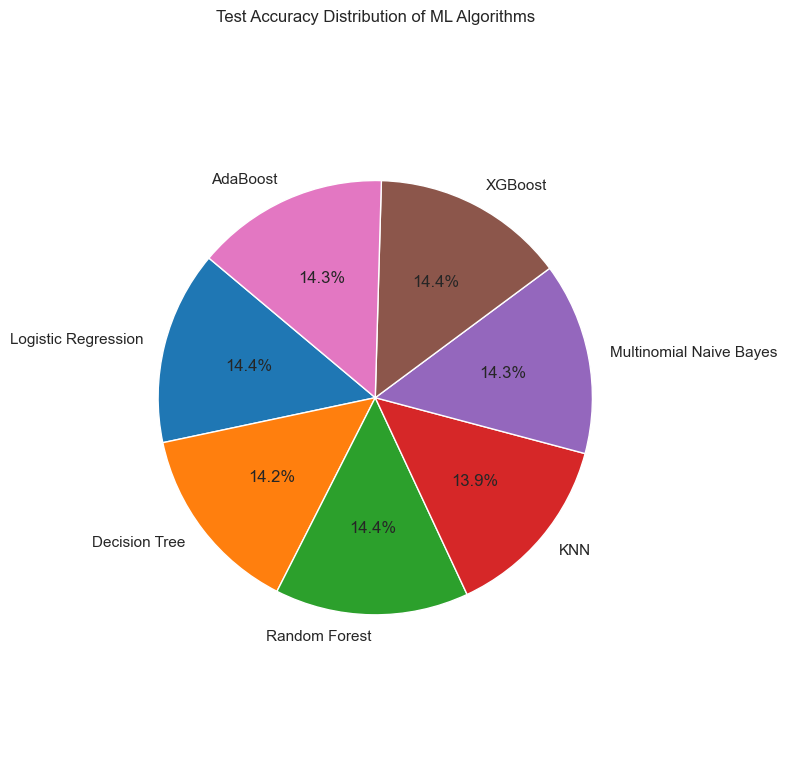

In [106]:
import matplotlib.pyplot as plt

# Define the ML algorithms and their test accuracies
data = {
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN',  'Multinomial Naive Bayes', 'XGBoost', 'AdaBoost'],
    'Test Accuracy (%)': [95.53, 93.99, 95.47, 92.03, 94.66, 95.25, 94.90]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define colors for the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Plotting the pie chart for test accuracies
plt.figure(figsize=(8, 8))
plt.pie(df['Test Accuracy (%)'], labels=df['Algorithm'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Test Accuracy Distribution of ML Algorithms')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


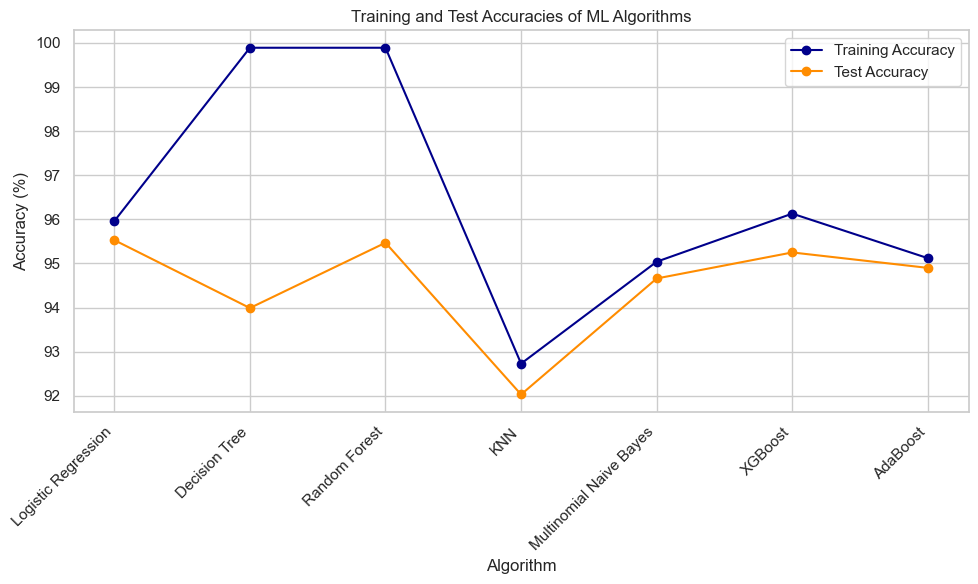

In [109]:
import matplotlib.pyplot as plt

# Define the ML algorithms and their training/test accuracies
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN',  'Multinomial Naive Bayes', 'XGBoost', 'AdaBoost']
training_accuracies = [95.96, 99.89, 99.89, 92.73, 95.04, 96.13, 95.12]
test_accuracies = [95.53, 93.99, 95.47, 92.03, 94.66, 95.25, 94.90]

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(algorithms, training_accuracies, marker='o', color='darkblue', label='Training Accuracy')
plt.plot(algorithms, test_accuracies, marker='o', color='darkorange', label='Test Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracies of ML Algorithms')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

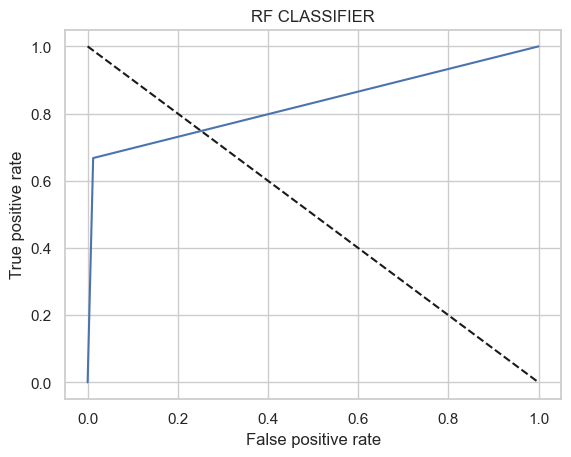

In [70]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

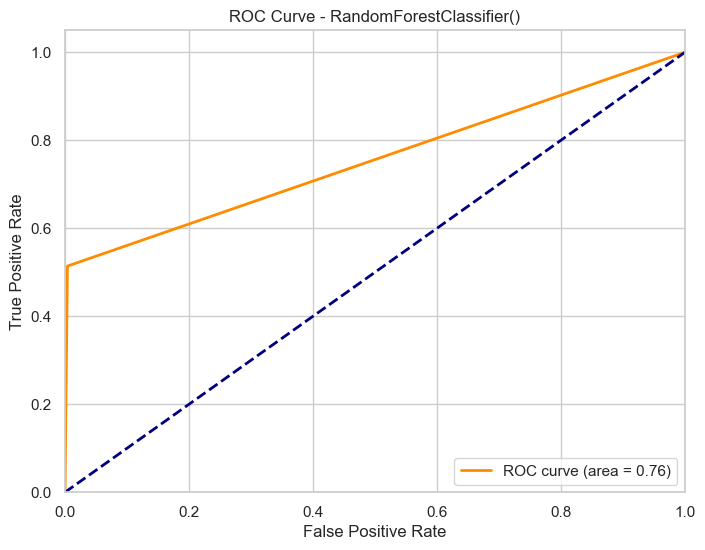

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, y_pred_test, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Usage
plot_roc_curve(y_test, y_pred_test, RF)


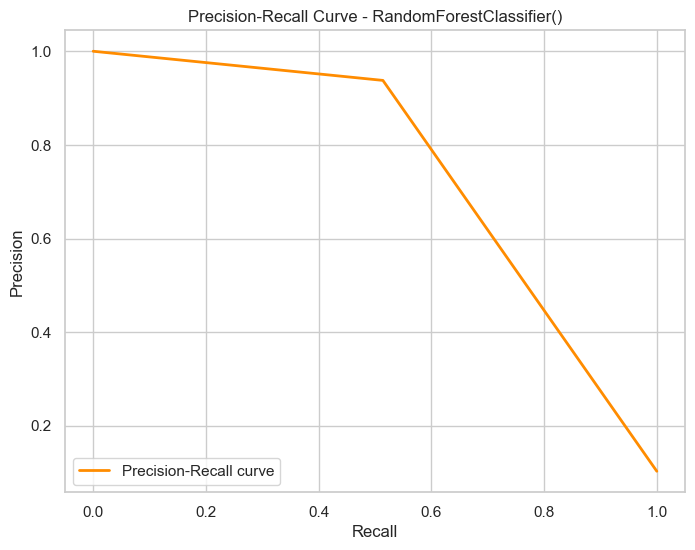

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_test, y_pred_test, model_name):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_test)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='lower left')
    plt.show()

# Usage
plot_precision_recall_curve(y_test, y_pred_test, RF)


In [72]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [73]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
import joblib
joblib.dump(RF,"malig.pkl")

['malig.pkl']

In [87]:
import joblib

# Load the pickle file using joblib
output_data = joblib.load('malig.pkl')

# Now you can access the output data stored in 'output_data'
print(output_data)



RandomForestClassifier()


In [266]:

##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

test=pd.read_csv('./test.csv')

test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [85]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(test['comment_text'])
x = features
features

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [268]:
np.sum(x)


532563.3679884712

In [269]:
test['comment_text']

0         Yo bitch Ja Rule is more succesful then you'll...
1         == From RfC == \n\n The title is fine as it is...
2         " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3         :If you have a look back at the source, the in...
4                 I don't anonymously edit articles at all.
                                ...                        
153159    . \n i totally agree, this stuff is nothing bu...
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, Length: 153164, dtype: object

In [47]:
import joblib
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

import os
model_directory = "Model"
os.makedirs(model_directory, exist_ok=True)
model_filename = os.path.join(model_directory, "logistic_regression_model.joblib")
joblib.dump(LG, model_filename)

print(f'Model saved successfully at {model_filename}')
model_filename = "Model/logistic_regression_model.joblib"

# Load the saved model
loaded_model = joblib.load(model_filename)
loaded_model
# print(x_train[1])
comment = "dirty"
input_features = tf_vec.transform([comment])
prediction = loaded_model.predict(input_features)
result = "Bad" if prediction[0] == 1 else "Not Bad"
result

Model saved successfully at Model\logistic_regression_model.joblib


'Bad'

In [91]:
import joblib
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

import os
model_directory = "Model"
os.makedirs(model_directory, exist_ok=True)
model_filename = os.path.join(model_directory, "RF_model.joblib")
joblib.dump(RF, model_filename)

print(f'Model saved successfully at {model_filename}')
model_filename = "Model/RF_model.joblib"

# Load the saved model
loaded_model = joblib.load(model_filename)
loaded_model
# print(x_train[1])
comment = "dog"
input_features = tf_vec.transform([comment])
prediction = loaded_model.predict(input_features)
result = "Bad" if prediction[0] == 1 else "Not Bad"
result

Model saved successfully at Model\RF_model.joblib


'Bad'

In [89]:
import assemblyai as aai

aai.settings.api_key = "61d8b67ac8db4521aedd70b9132ab22d"

transcriber = aai.Transcriber()

audio_url = (
    "audios/president-is-moron.wav"
)

config = aai.TranscriptionConfig(speaker_labels=True)

transcript = transcriber.transcribe(audio_url, config)

print(transcript.text)

#for utterance in transcript.utterances:
 #   print(f"Speaker {utterance.speaker}: {utterance.text}")

The president is an utter moron.


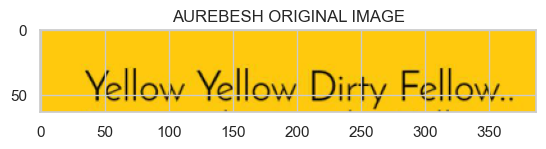

In [92]:
#Converting the image to the text using OCR (EasyOCR)
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 


image = cv2.imread('badword_images/dirtyfellow.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

In [93]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

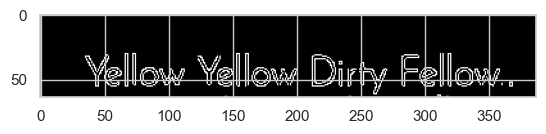

In [94]:
plt.imshow(images['canny'], cmap='gray')

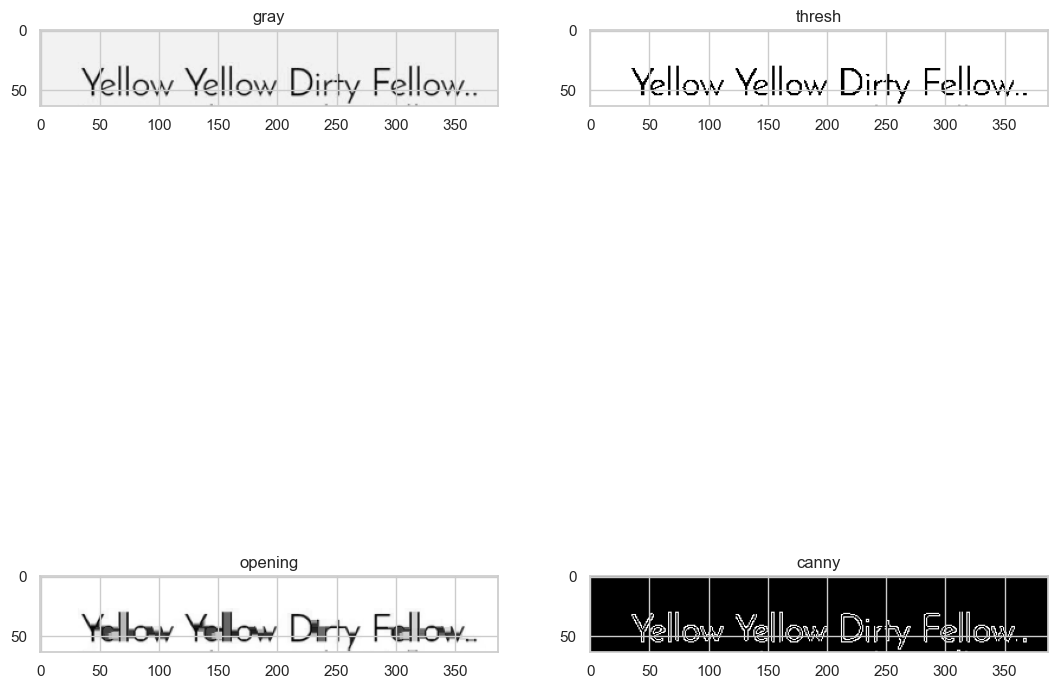

In [100]:
fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title( keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')  

In [96]:
import easyocr

print("Enter the language of your text : ")
lang = str(input())

reader = easyocr.Reader(['en', lang])


result = reader.readtext(image)

print("\n")

for detection in result:
    print(detection[1])  

Enter the language of your text : 
en


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.




Yellow Yellow Dirty Fellow.


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


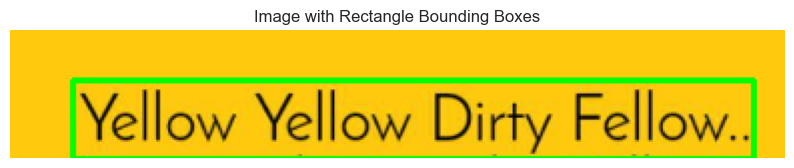

In [97]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Read text and obtain bounding boxes
result = reader.readtext(image, detail=1)

# Load the image


# Draw bounding boxes on the image
for detection in result:
    # Extract bounding box coordinates
    box = detection[0]
    x1, y1 = int(box[0][0]), int(box[0][1])
    x2, y2 = int(box[1][0]), int(box[1][1])
    x3, y3 = int(box[2][0]), int(box[2][1])
    x4, y4 = int(box[3][0]), int(box[3][1])
    
    # Draw rectangle bounding box
    cv2.rectangle(image, (x1, y1), (x3, y3), (0, 255, 0), 2)

# Convert BGR image to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image with rectangle bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title('Image with Rectangle Bounding Boxes')
plt.axis('off')
plt.show()


In [98]:
custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('OUTPUT --> GRAYSCALE IMAGE')
print('-----------------------------------------')
reader = easyocr.Reader(['en', lang])
result = reader.readtext(images['gray'])
for detection_gray in result:
    print(detection_gray[1]) 
print('\n-----------------------------------------')
print('OUTPUT --> THRESHOLDED IMAGE')
reader = easyocr.Reader(['en', lang])
result = reader.readtext(images['thresh'])
for detection_thresh in result:
    print(detection_thresh[1]) 
print('-----------------------------------------')
print('OUTPUT --> OPENED IMAGE')
reader = easyocr.Reader(['en', lang])
result = reader.readtext(images['opening'])
for detection_opened in result:
    print(detection_opened[1]) 
print('-----------------------------------------')
print('OUTPUT --> CANNYEDGE IMAGE')
print('-----------------------------------------')
reader = easyocr.Reader(['en', lang])
result = reader.readtext(images['canny'])
for detection_canny in result:
    print(detection_canny[1]) 
print('-----------------------------------------')

print('\n-----------------------------------------')


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


-----------------------------------------
OUTPUT --> GRAYSCALE IMAGE
-----------------------------------------


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Yellow Yellow Dirty Fellow-

-----------------------------------------
OUTPUT --> THRESHOLDED IMAGE


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Yellow Yellow Dirty Fellow-
-----------------------------------------
OUTPUT --> OPENED IMAGE


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Yellow Yellow Dirty Fdlow-
-----------------------------------------
OUTPUT --> CANNYEDGE IMAGE
-----------------------------------------
Yellow Yellow Dirty Fellow .
-----------------------------------------

-----------------------------------------


In [99]:
from deep_translator import GoogleTranslator

to_translate = detection_gray[1]
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
print(translated)


Yellow Yellow Dirty Fellow-


In [90]:
#This is for only texts not images 
from deep_translator import GoogleTranslator

print("Enter the text : ")
input_text = str(input())
to_translate = input_text
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
print(translated)


Enter the text : 
gay
gay


In [31]:

# The code is for normal emoji to text using emoji library(inbuilt)
import emoji

def convert_emoji_to_text(emoji_text):
    text_with_aliases = emoji.demojize(emoji_text)
    text_without_colons = text_with_aliases.replace(":","")
    return text_without_colons

if __name__ == "__main__":
    emoji_text = "😈"
    converted_text = convert_emoji_to_text(emoji_text)
    print("Original Text:", emoji_text)
    print("Converted Text:", converted_text)

Original Text: 😈
Converted Text: smiling_face_with_horns


In [28]:

#constructing the slang dictionary 
emojis_dict = {
    '🍆': 'Penis',
    '🍌': 'Penis',
    '🍑': 'Bottom',
    '🥴': 'Drunk, hungover or sexually aroused',
    '🥵': 'Means ‘hot’ in a sexual sense',
    '😵': 'When someone has seen something sex-rated',
    '🙃': 'Used to express annoyance',
    '🚛': 'Large and/or shapely bottom',
    '🌮': 'Vagina',
    '🤡': 'Describes something that is foolish',
    '👻': 'Ghosted (ignored or dumped with no explanation)',
    '🧢': 'Symbolizes a lie',
    '📬': 'Can be used to mean sex',
    '👉👈': 'Shy, nervous – usually in the context of flirting',
    '👉👌': 'Sexual intercourse',
    '🐫': 'The act of sex (humping)',
    '🔥': 'Indicates someone is attractive or sexy',
    '🧿': 'Represents warding off the evil eye',
    '🧠': 'Oral sex',
    '💦': 'Ejaculation',
    '🎪': 'Erection',
    '👅': 'May indicate sexual activity, especially oral sex',
    '⏳': 'Used when someone has an hourglass body',
    '🥶': 'Often used in response to a nasty comment, meaning “That was cold”',
    '😈': 'Feeling frisky or naughty',
    '👁️‍🗨️👄👁️‍🗨️': 'A response that means “It is what it is”',
    '🧚‍♀️✨': 'Denotes a sarcastic, mean-spirited tone',
    '🍃': 'Marijuana',
    '🐙': 'Virtual hug',
    '🍒': 'Breasts or virginity',
    '🍇': 'Testicles',
    '💓': 'Depending on the color, heart emoji meanings can vary from declarations of love to jealousy, dark humor or sorrow',
    '🦋': 'Having a crush or falling in love – represents butterflies in the stomach',
    '🎞️': 'Someone wants an x-rated movie',
    '🖥️': 'Someone wants an x-rated chat',
    '📸': 'Flashing or taking sexting to the next level with nude pictures',
    '🍝': 'Represents nudes',
    '👀': 'Used when sending or receiving nudes',
    '🤤': 'Desiring someone sexually – often used in response to nudes',
    '🙆': 'Can be used to signal a woman’s orgasm',
    '💳': 'Often used on TikTok to express wanting something shown in a video',
    '💯': 'Stamp of approval',
    '🔨': 'Sexual activity',
    '🐍': 'Someone is a back stabber',
    '🌶️': 'Inappropriate or risky content',
    '🌽': 'Porn',
    '👄': 'kiss',
    '💩': 'Poop',
    '🔪': 'kill',
    '🖕': 'fuck',
    '❄️': 'drugs',
    '💨 ': 'farting',
    '✊' : 'save'
}


In [29]:
#Splitting the text and emoji
def split_text_and_emoji(emoji_text):
    text = ''
    emojis = ''
    
    for char in emoji_text:
        if char.isalpha() or char.isspace():
            text += char
        else:
            emojis += char
    
    return text.strip(), emojis.strip()


text, emojis = split_text_and_emoji(emoji_text)

print("Text:", text)
print("Emojis:", emojis)


Text: I had
Emojis: 💦


In [30]:

#Get the meaning of the emoji
def get_emoji_meaning(emoji):
    if emoji in emojis_dict:
        return emojis_dict[emoji]
    else:
        return convert_emoji_to_text(emoji_text)

meaning = get_emoji_meaning(emojis)
print(meaning)


Ejaculation


In [31]:
#To check if the dictionary contains the emoji

def contains_emoji_from_dict(emoji_text, emojis_dict):
    for emoji_symbol in emojis_dict.keys():
        if emoji_symbol in emoji_text:
            return emoji_symbol
    return False

emoji_symbol = contains_emoji_from_dict(emoji_text,emojis_dict)
slange = get_emoji_meaning(emoji_symbol)
print(slange)

Ejaculation


In [32]:
def custom_emoji_to_text(emoji_symbol):
    if emoji_symbol in emojis_dict:
        return emojis_dict[emoji_symbol]
    else:
        return emoji_symbol


#print(contains_emoji_from_dict(emojis,emojis_dict))
#print(custom_emoji_to_text(emojis)) 



In [33]:
#correct for everything
text_converted_slange = text + ' '+ slange
text_converted_slange

'I had Ejaculation'

In [34]:
print(text_converted_slange)
print(converted_text)

I had Ejaculation
I had sweat_droplets


In [ ]:
#If the user expects the outputed text to be in his prefered language then 
from deep_translator import GoogleTranslator

print("Enter you preffered language : ")
input_lang = str(input())
to_translate = text_converted_slange
translated = GoogleTranslator(source='auto', target=input_lang).translate(to_translate)
print(translated)

to_translate = converted_text
translated = GoogleTranslator(source='auto', target=input_lang).translate(to_translate)
print(translated)


In [ ]:
#using the model to predict the text from images , audio and emojis

import joblib
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

import os
model_directory = "Model"
os.makedirs(model_directory, exist_ok=True)
model_filename = os.path.join(model_directory, "logistic_regression_model.joblib")
joblib.dump(RF, model_filename)

print(f'Model saved successfully at {model_filename}')
model_filename = "Model/logistic_regression_model.joblib"

# Load the saved model
loaded_model = joblib.load(model_filename)
loaded_model
# print(x_train[1])
comment = detection_thresh[1]
input_features = tf_vec.transform([comment])
prediction = loaded_model.predict(input_features)
result = "Bad" if prediction[0] == 1 else "Not Bad"
result